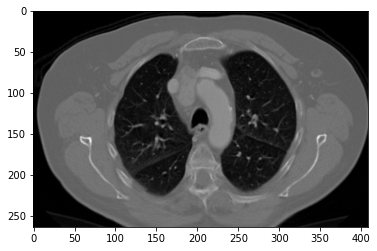

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import pickle
DATADIR = r"D:\hope\Chest CT-Scan\Data\train"
# CATEGORIES = ["adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib", "large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa","normal","squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa"]

CATEGORIES = ["adenocarcinoma", "large.cell.carcinoma","normal","squamous.cell.carcinoma"]
for category in CATEGORIES: 
    path = os.path.join(DATADIR,category) 

    for img in os.listdir(path):  # iterate over each image 
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(264, 409)


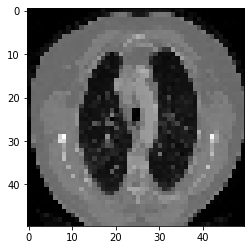

In [82]:
print(img_array)

print(img_array.shape)

IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

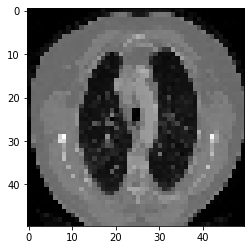

In [83]:
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [84]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do 
        path = os.path.join(DATADIR,category)  # create 
        class_num = CATEGORIES.index(category)  # get the classification  

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|██████████| 155/155 [00:00<00:00, 501.61it/s]613



In [69]:
import random

random.shuffle(training_data)
random.shuffle(training_data)

for sample in training_data[:10]:
    print(sample[1])

3
0
0
3
2
2
1
1
2
3


In [107]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[1]
   [0]
   [1]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [1]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]]


In [86]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)


In [108]:

X = X/255.0
y=np.array(y).reshape(len(y),1)


model = Sequential()
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))

model.add(tf.keras.layers.Dense(4,activation=tf.nn.segmoid))
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

model.fit(X, y, batch_size=16, epochs=5)





Epoch 1/5
39/39 [==============================] - 0s 872us/step - loss: 1.2517 - accuracy: 0.4274
Epoch 2/5
39/39 [==============================] - 0s 846us/step - loss: 0.9293 - accuracy: 0.6232
Epoch 3/5
39/39 [==============================] - 0s 897us/step - loss: 0.7587 - accuracy: 0.7096
Epoch 4/5
39/39 [==============================] - 0s 923us/step - loss: 0.6711 - accuracy: 0.7308
Epoch 5/5
39/39 [==============================] - 0s 897us/step - loss: 0.5476 - accuracy: 0.8010


In [106]:
import cv2 as cv
import os
path=r"D:\hope\Chest CT-Scan\Data\test\normal"
for pic in os.listdir(path):
    img=cv.imread(os.path.join(path,pic),cv.IMREAD_GRAYSCALE)

    img=cv.resize(img,(50,50))
    img=img.reshape(-1,2500)
    predections=model.predict([img])
    print(np.argmax(predections[0]))

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
